# MLB 85/1-3-1

* [Verteilung der Funde](#Verteilung-der-Funde)
* [Keramische Stilgruppen](#Keramische-Stilgruppen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MLB')
           AND ((t_Komplex.bef_nr) = '85/1-3-1'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Art,Tiefe
0,MLB,85/1,"-3-1-1:18, 31",BatMLB,1,156,120,K,"0,9"
1,MLB,85/1,-1:58,BatMLB,1,26,70,K,"0,5"
2,MLB,85/1,-1:84,DON (?),1,54,120,K,"0,5"
3,MLB,85/1,-1:87,,1,76,120,K,"0,5"
4,MLB,85/1,-2:3,BatMLB,1,35,70,K,"0,65"


In [3]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum, fill_value = 0)
df_pivot.rename(columns={'HL': 'Hüttenlehm', 'K': 'Keramik'}, inplace=True)
df_pivot

Art,Hüttenlehm,Keramik,Stein
Tiefe,,,
"0,5",0,1392,0
"0,65",96,768,108
"0,75",0,306,0
"0,9",0,838,0
"1,05",0,974,0
"1,2",0,116,0
"1,39",0,96,0


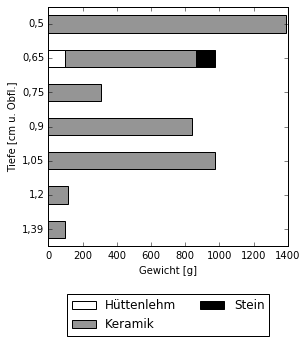

In [64]:
axes = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Greys')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
xlim = axes.get_xlim()
ylim = axes.get_ylim()
plt.gca().invert_yaxis()
# plt.gca().set_aspect(200)
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-1_MLB85-131_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MLB 85/1-3-1** Fundverteilung'

In [65]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-01_MLB85-1-3-1_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,gebrannter Lehm,1,0.3,0.10,2.0
1,Keramik,305,99.0,4.49,95.7
2,Stein,2,0.6,0.11,2.3


## Keramische Stilgruppen

In [66]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MLB')
           AND ((t_Komplex.bef_nr) = '85/1-3-1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
df['Typ'] = df['Typ'].replace('','(?)')
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,MLB,85/1,"-3-1-1:18, 31",BatMLB,156,120,K,"0,9"
1,MLB,85/1,-1:58,BatMLB,26,70,K,"0,5"
2,MLB,85/1,-1:84,DON (?),54,120,K,"0,5"
3,MLB,85/1,-1:87,(?),76,120,K,"0,5"
4,MLB,85/1,-2:3,BatMLB,35,70,K,"0,65"


In [67]:
np.sum(df['Gewicht'])

4490

In [68]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum, fill_value = 0)
df_pivot

Typ,(?),BBL,BatMLB,BatMLB (?),BatMLB / MDB (?),DAM (?),DON,DON (?),MAT,MAT (?),NGB (?)
Tiefe,,,,,,,,,,,
"0,5",666,0,446,57,87,0,0,54,35,20,11
"0,65",209,0,468,36,0,6,6,0,0,0,0
"0,75",159,0,105,0,0,0,29,13,0,0,0
"0,9",181,0,651,0,0,0,0,0,0,6,0
"1,05",129,10,827,0,0,0,0,0,8,0,0
"1,2",68,0,0,48,0,0,0,0,0,0,0
"1,39",8,0,88,0,0,0,0,0,0,0,0


> ToDo: evtl. Chronologieschema zur Abfolge der Stilgruppen in die DB ablegen

In [70]:
axes = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = axes.get_xlim()
ylim = axes.get_ylim()
# plt.gca().set_aspect(200)
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-1_MLB85-131_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MLB 85/1-3-1** keramische Stilgruppen

In [71]:
df_pivot.plot(kind = 'line', cmap = 'Paired')
plt.xlabel('Tiefe [cm u. Obfl.]')
plt.ylabel('Gewicht [g]')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-1_MLB85-131_KeramikStilgruppen_2.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MLB 85/1-3-1** keramische Stilgruppen

In [72]:
df_pivot.plot(kind = 'area', cmap = 'Paired')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)

## Fragmentierung

In [73]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MLB')
           AND ((t_Komplex.bef_nr) = '85/1-3-1')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Gr_Clist) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,objID,Gewicht,Gr_Clist,Tiefe
0,266,156,120,"0,9"
1,267,26,70,"0,5"
2,268,54,120,"0,5"
3,269,76,120,"0,5"
4,271,35,70,"0,65"


In [74]:
df_pivot = df.pivot_table(values = 'objID', index = 'Tiefe', columns = 'Gr_Clist', aggfunc = len, fill_value = 0)
df_pivot

Gr_Clist,30,70,120,200
Tiefe,,,,
"0,5",8,30,3,0
"0,65",3,18,1,0
"0,75",1,7,0,0
"0,9",3,6,2,0
"1,05",4,4,3,1
"1,2",0,2,0,0
"1,39",0,3,0,0


In [75]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
# df_perc

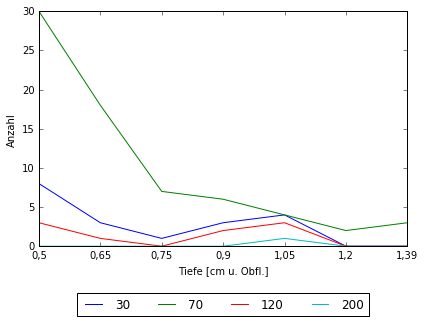

In [76]:
df_pivot.plot(kind = 'line')
plt.xlabel('Tiefe [cm u. Obfl.]')
plt.ylabel('Anzahl')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=4, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-1_MLB85-131_KeramikFragmentierung.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [77]:
df_perc

Gr_Clist,30,70,120,200
Tiefe,,,,
"0,5",0.195122,0.731707,0.073171,0.000000
"0,65",0.136364,0.818182,0.045455,0.000000
"0,75",0.125000,0.875000,0.000000,0.000000
"0,9",0.272727,0.545455,0.181818,0.000000
"1,05",0.333333,0.333333,0.250000,0.083333
"1,2",0.000000,1.000000,0.000000,0.000000
"1,39",0.000000,1.000000,0.000000,0.000000


> **MLB 85/1-3-1** Fragmentierung
> 
> -> *Stimmt nicht mit Excel-Fassung überein*

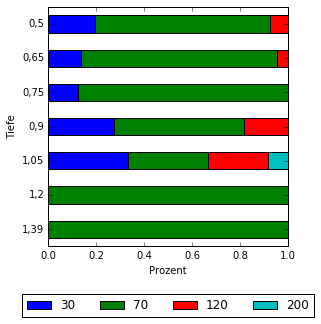

In [85]:
axes = df_perc.plot(kind = 'barh', stacked = True)
plt.xlabel('Prozent')
# plt.gca().set_aspect(.13)
xlim = axes.get_xlim()
ylim = axes.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=4, borderaxespad = 0.)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../output/figs/9-1_MLB85-131_KeramikFragmentierung_B.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Verzierungselemente

In [17]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MLB')
            AND ((t_Komplex.bef_nr) = '85/1-3-1')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [18]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,V01a,V01c,V01d,V01e,V02a,V02b,V02c,V03a,V03b,V03c,...,V06d,V09a1,V09a3,V09b,V09c2,V09i,V11b1,V12a1,V12b,V12c
pos,,,,,,,,,,,,,,,,,,,,,
1 Innen,32,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2 Rand,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3 Oberteil,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4 Hals,10,1,0,2,0,0,0,0,2,0,...,1,0,0,0,1,5,0,0,0,0
5 Schulter,18,0,1,1,1,1,0,0,1,3,...,0,3,0,1,0,6,0,1,1,0
6 Bauch,22,3,1,8,1,0,4,1,5,0,...,0,0,4,1,0,1,1,0,0,1
8 Bodenansatz,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_pivot = df_pivot.sort_index(ascending=True)

In [20]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

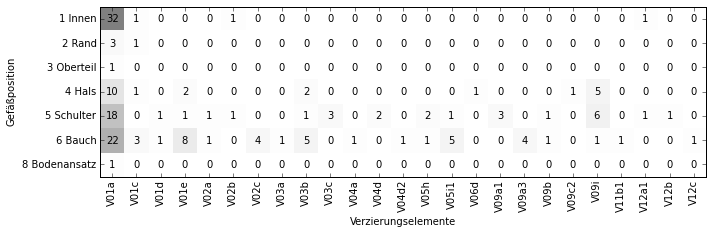

In [21]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-1_MLB85-131_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **MLB 85/1-3-1** Verzierungselemente

n

In [22]:
df['objID'].nunique()

68

In [23]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Reds')